In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# CAS Data Science Projekt Sleep Analysis - Linear Regression

# Prepare data


In [2]:
data = pd.read_csv('prepared/fitbit_data_moon_crisp.csv', index_col=0)
data.dropna(inplace=True)
data.drop(columns=['date', 'revitalization_score'], inplace=True)
data.drop(columns=['restlessness'], inplace=True)
data.rename(columns={'overall_score':'score', 'duration_score':'DUS', 'deep_sleep_in_minutes':'DS', 'composition_score':'CS', 'Moon Phase': 'moon','resting_heart_rate':'RHR', 'bpm':"BPM"}, inplace=True)
data = pd.get_dummies(data, columns=['moon'])

In [3]:
data.head(5)

,skin_temp_avg,score,CS,DUS,DS,RHR,avg_bpm,moon_First Quarter,moon_Full Moon,moon_New Moon,moon_Third Quarter
0,30.505155,67,17,35,66,60,66.494309,0,0,1,0
2,29.899359,88,21,45,126,60,60.620142,1,0,0,0
3,29.917705,56,15,26,23,56,60.969515,0,0,0,1
4,30.016326,75,20,36,69,55,59.398694,1,0,0,0
5,30.858560,68,19,31,69,60,58.885041,0,0,1,0


In [4]:
# Split data into X and y
X_data = data.drop(columns='score')
y_data = data.score

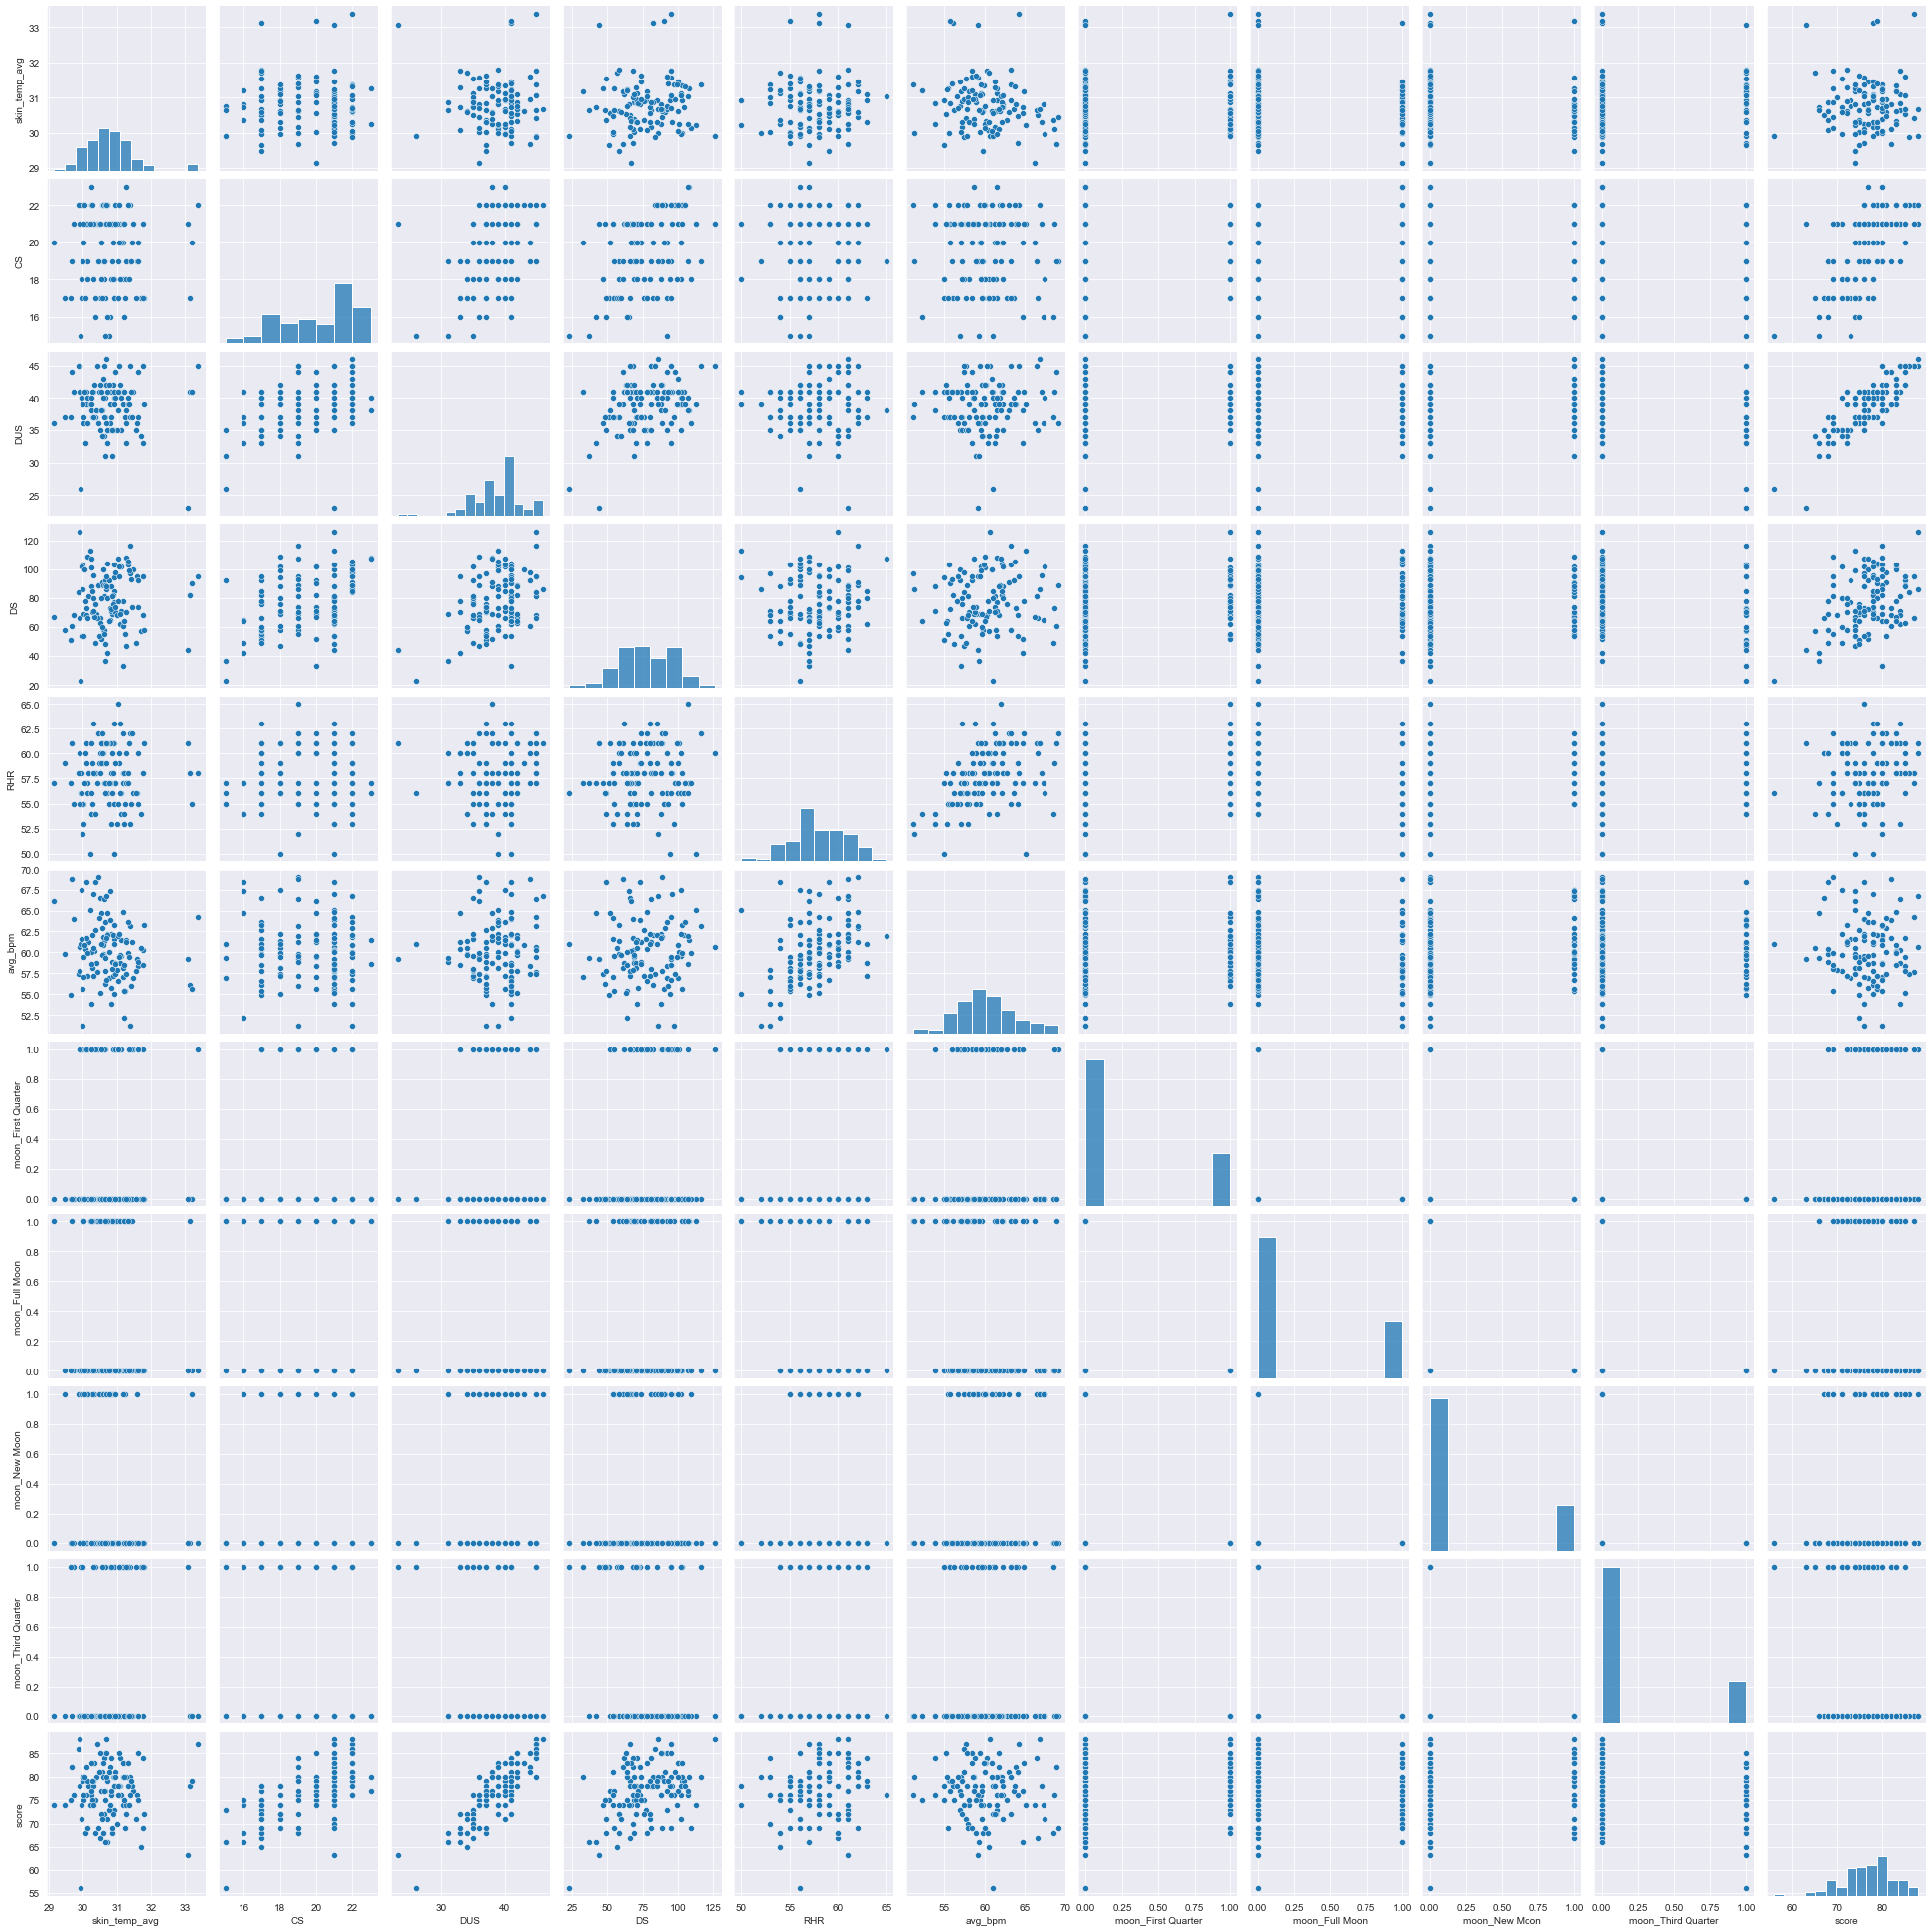

In [5]:
sns.pairplot(pd.concat([X_data, y_data], axis=1))
plt.show()

In [6]:
# set aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, shuffle = True)

In [7]:
# same for the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state= 8)

In [8]:
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("X_val shape: {}".format(y_train.shape))

X_train shape: (65, 10)
X_test shape: (30, 10)
X_val shape: (65,)


In [9]:
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("y val shape: {}".format(y_test.shape))

y_train shape: (65,)
y_test shape: (30,)
y val shape: (30,)


<AxesSubplot:xlabel='DUS', ylabel='score'>

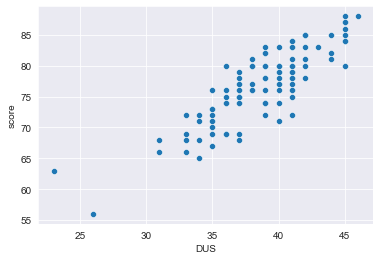

In [10]:
sns.scatterplot(data=pd.concat([X_data, y_data], axis=1), x='DUS', y='score')

# Define and train model

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline

In [12]:
# # Define model
# pipe = Pipeline([
#     ('ohe', make_column_transformer(
#         (OneHotEncoder(handle_unknown='ignore'),
#         ['moon']))
#     ),
#     ('reg', LinearRegression())
# ])
#
# from sklearn import set_config
#
# set_config(display="diagram")
# pipe


In [13]:
X_train

,skin_temp_avg,CS,DUS,DS,RHR,avg_bpm,moon_First Quarter,moon_Full Moon,moon_New Moon,moon_Third Quarter
4,30.016326,20,36,69,55,59.398694,1,0,0,0
71,30.369042,17,37,76,58,62.734395,1,0,0,0
163,30.675277,21,42,88,61,61.768694,0,0,1,0
121,30.944861,22,44,98,57,57.380502,1,0,0,0
30,29.975067,22,40,103,55,55.623870,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
11,30.842851,21,41,71,53,53.884582,0,1,0,0
61,31.464916,21,41,100,56,56.926363,1,0,0,0
39,30.914577,17,35,77,61,61.554966,1,0,0,0
113,31.787028,17,39,58,61,63.259204,0,0,0,1


In [14]:
lr = LinearRegression()

In [15]:
lr.fit(X_train, y_train)
print(lr.intercept_)

y_val_hat = lr.predict(X_val)

3.971172113108068


In [16]:
intercept = lr.intercept_
slope = lr.coef_[0]

print('intercept: '+ str(intercept))
print('slope: '+ str(slope))


intercept: 3.971172113108068
slope: -0.03601668272520889


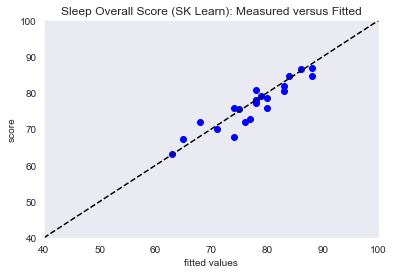

In [17]:
plt.close()

plt.scatter(y_val, y_val_hat, color='blue')
plt.xlim([40,100])
plt.ylim([40,100])
plt.grid()
plt.axhline(y=0, color='black', linewidth=0.5)
plt.axvline(x=0, color='black', linewidth=0.5)
plt.title('Sleep Overall Score (SK Learn): Measured versus Fitted')
plt.xlabel('fitted values')
plt.ylabel('score')
plt.axline((1, 1), slope=1, color='black', ls="--")
plt.show()

In [18]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_val, y_val_hat)

6.65777965472883

# Predict Test Set

In [19]:
y_test_hat = lr.predict(X_test)

In [20]:
# How good are we on the test data?
mean_squared_error(y_test, y_test_hat)

4.692750692097214

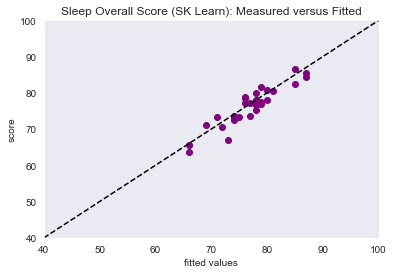

In [21]:
plt.close()

plt.scatter(y_test, y_test_hat, color='purple')
plt.xlim([40,100])
plt.ylim([40,100])
plt.grid()
plt.axhline(y=0, color='black', linewidth=0.5)
plt.axvline(x=0, color='black', linewidth=0.5)
plt.title('Sleep Overall Score (SK Learn): Measured versus Fitted')
plt.xlabel('fitted values')
plt.ylabel('score')
plt.axline((1, 1), slope=1, color='black', ls="--")
plt.show()